Visualizing Worst Action Sequence
Step 1, Action: [0]
Aircraft Rotations for ../data/Training-new-2/Scenario_01


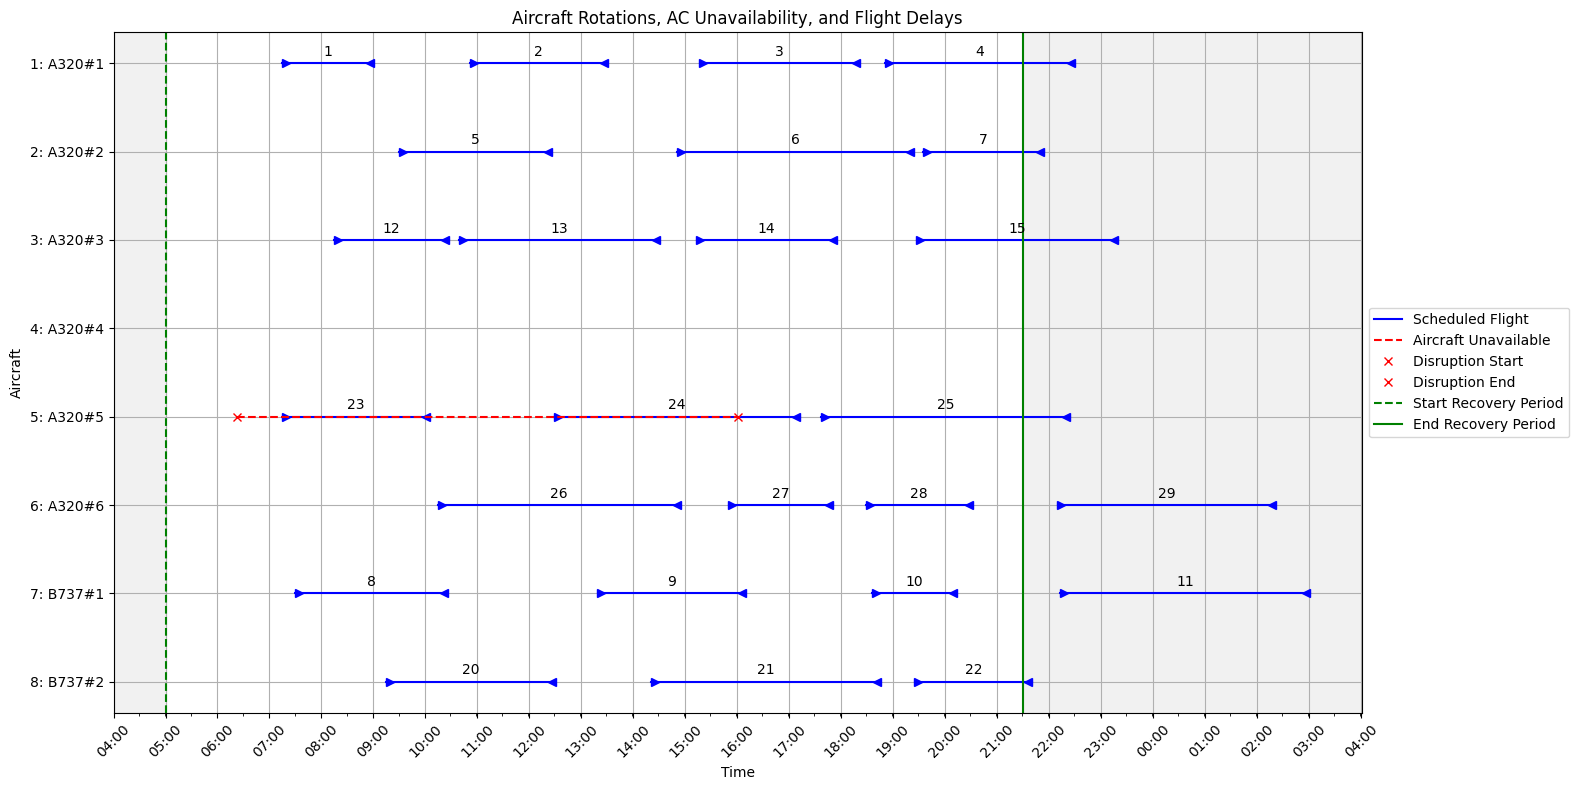

--------------------------------------------------
Step 2, Action: [0]
Aircraft Rotations for ../data/Training-new-2/Scenario_01


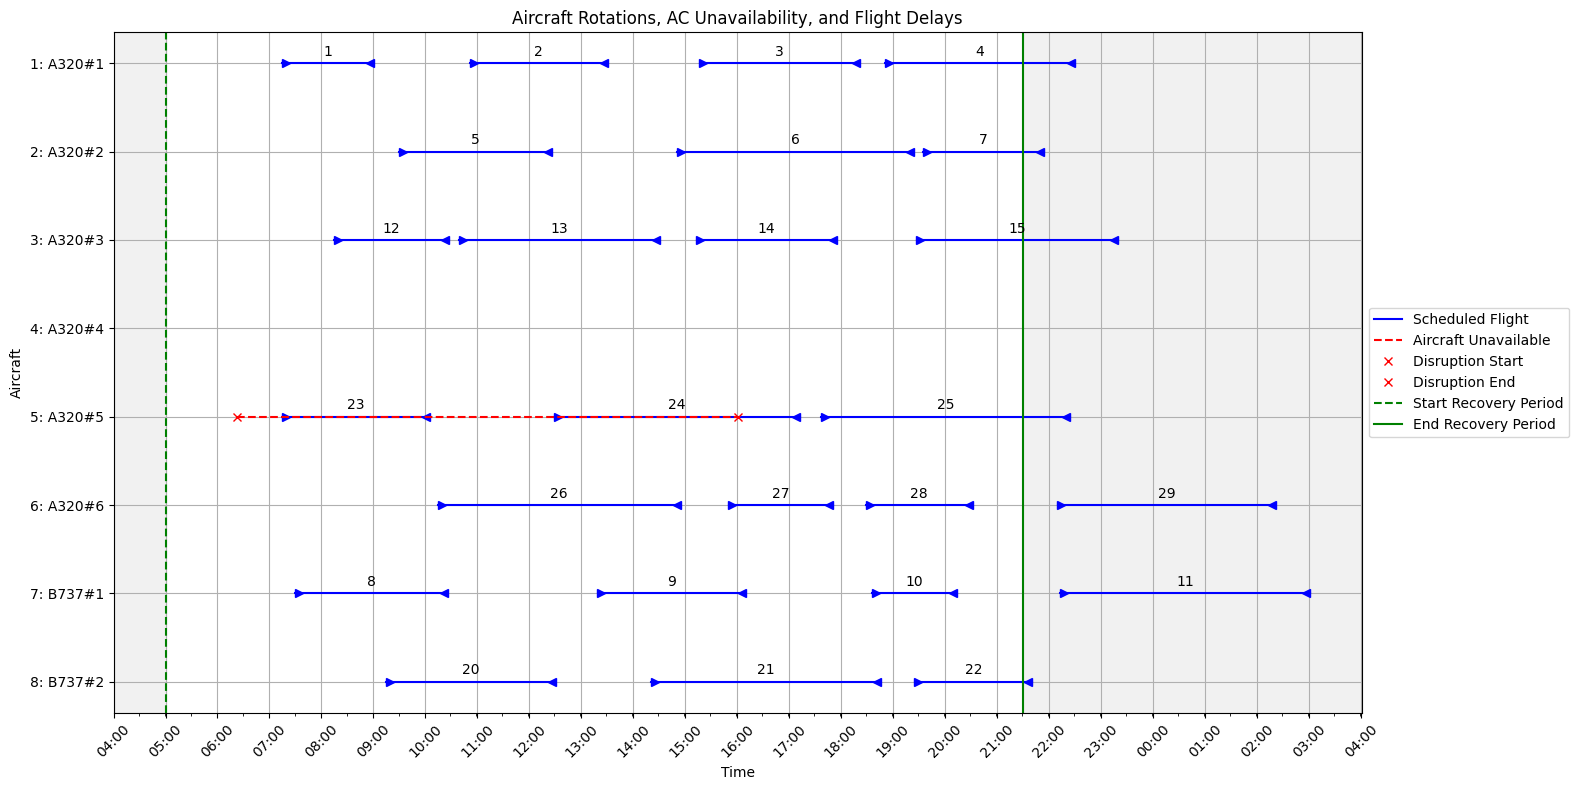

--------------------------------------------------
Step 3, Action: [0]
Aircraft Rotations for ../data/Training-new-2/Scenario_01


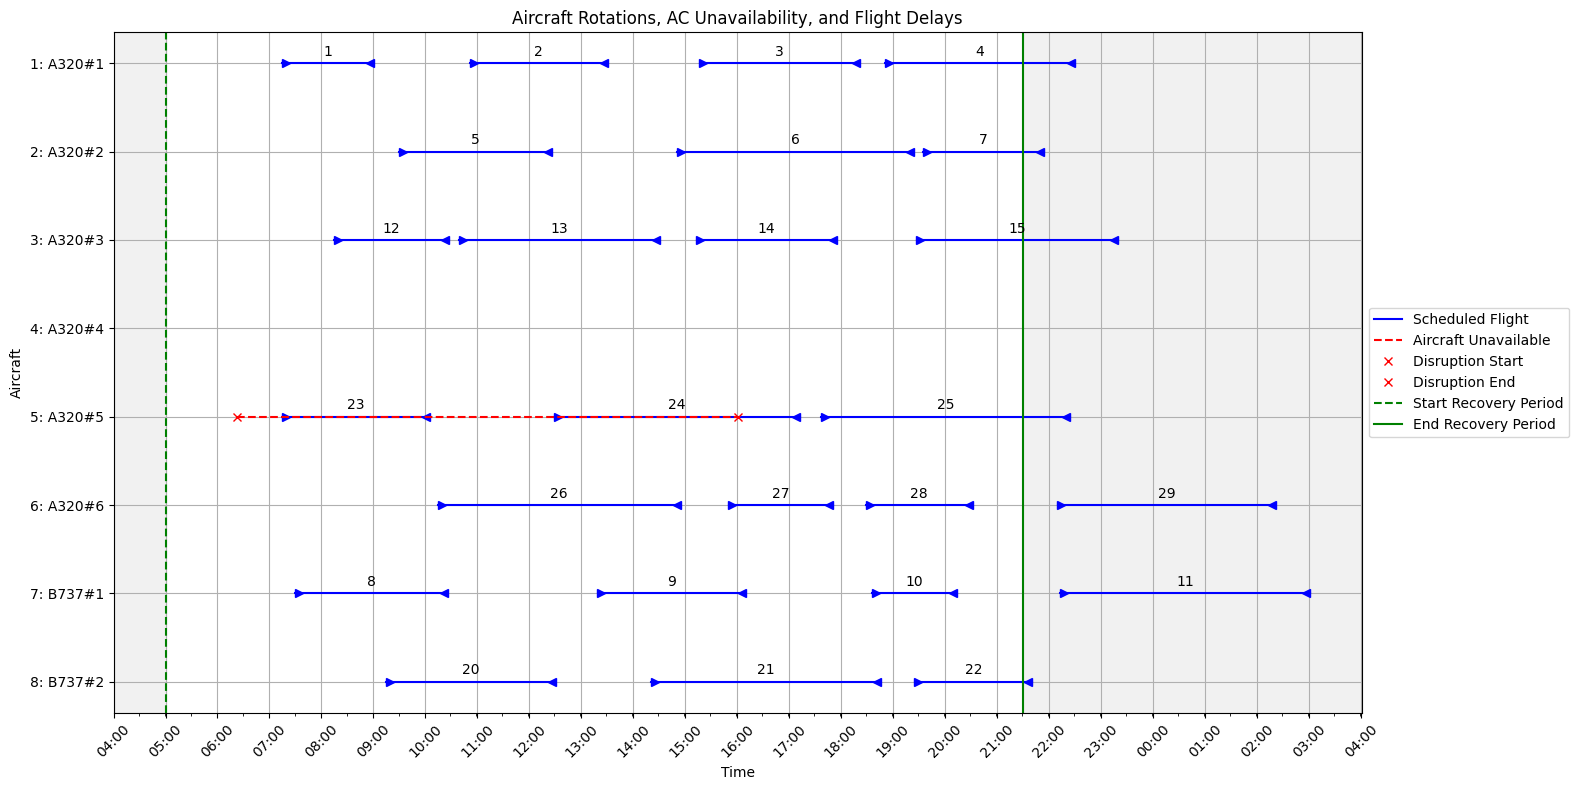

--------------------------------------------------
Step 4, Action: [4]
Aircraft Rotations for ../data/Training-new-2/Scenario_01


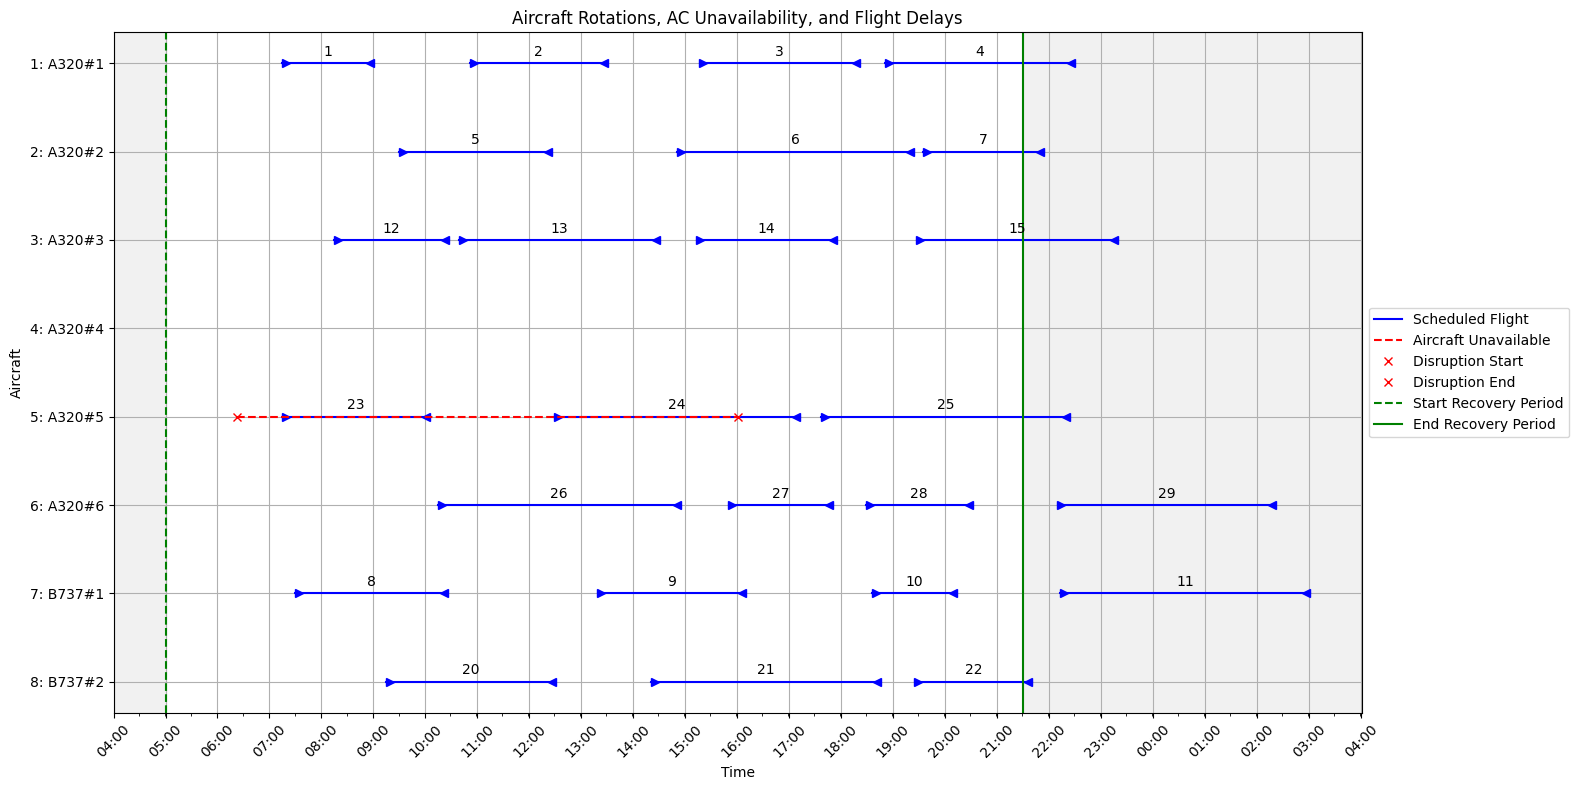

--------------------------------------------------
Step 5, Action: [2]
Aircraft Rotations for ../data/Training-new-2/Scenario_01


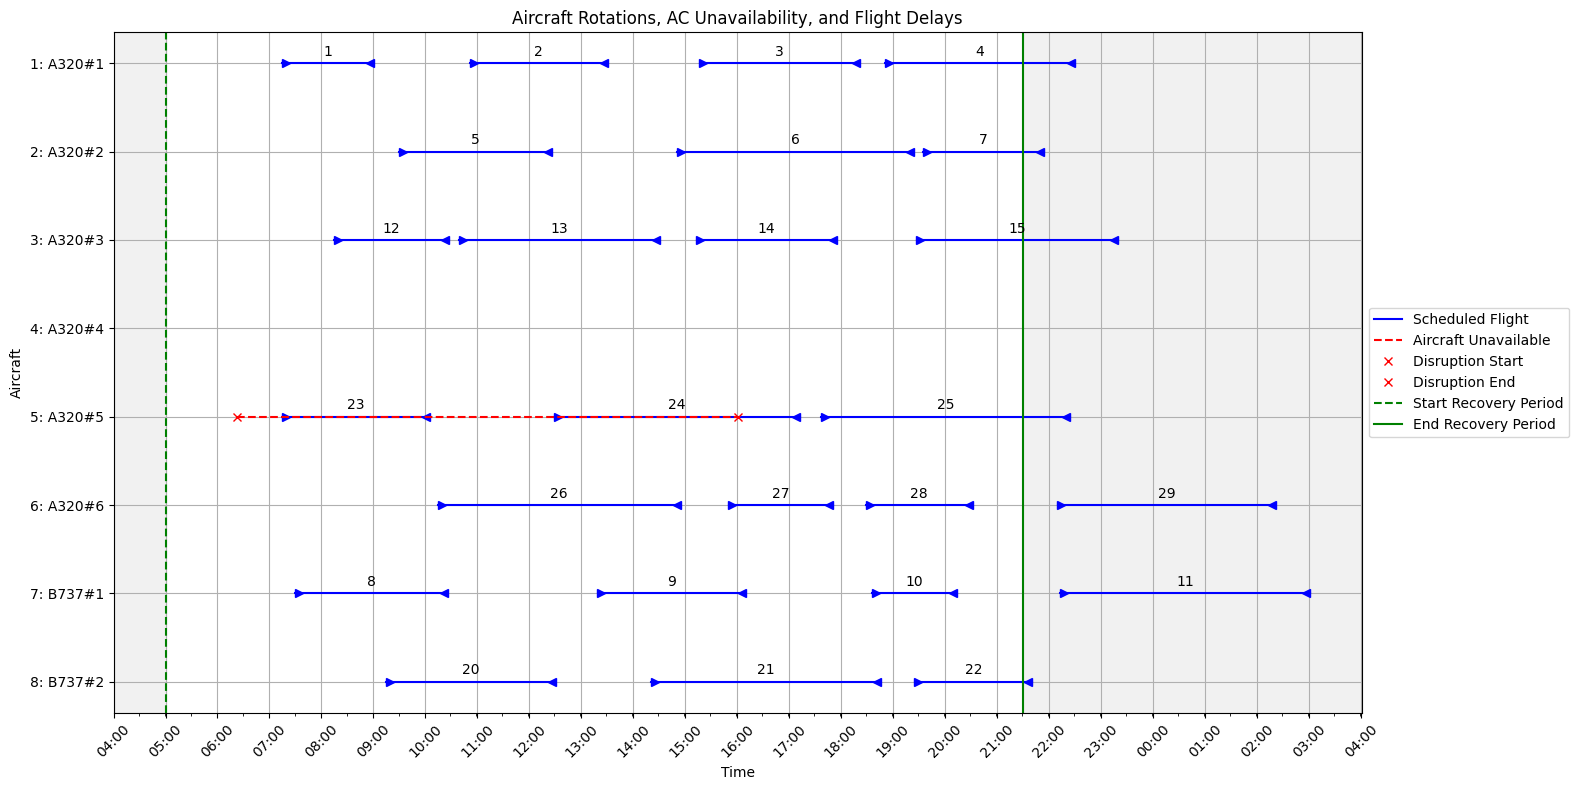

--------------------------------------------------
Step 6, Action: [0]
Aircraft Rotations for ../data/Training-new-2/Scenario_01


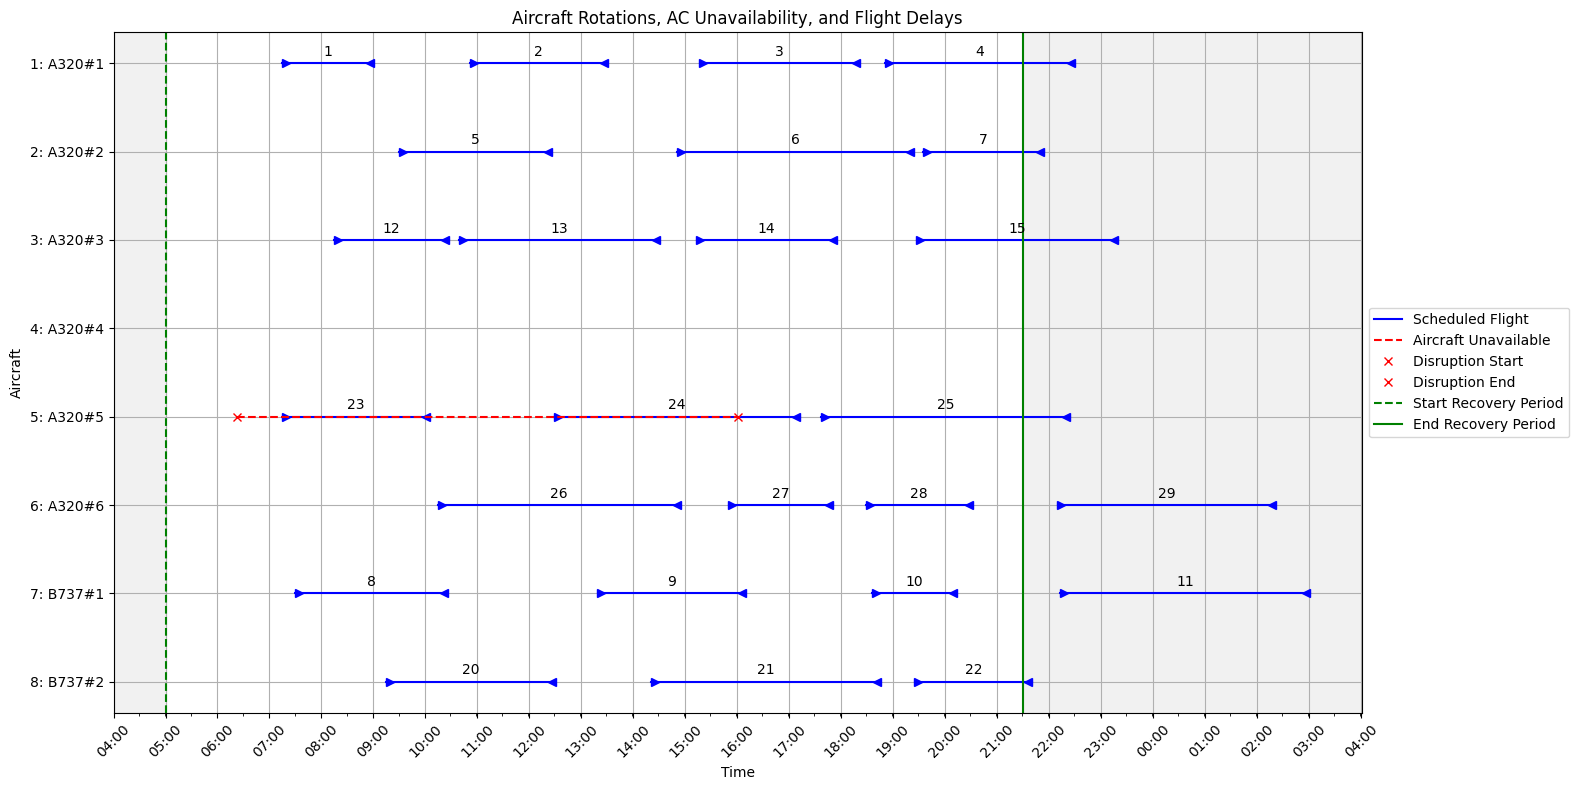

--------------------------------------------------
Total Reward for Worst Action Sequence: -9285.0
Visualizing Best Action Sequence
Step 1, Action: [2]
Aircraft Rotations for ../data/Training-new-2/Scenario_01


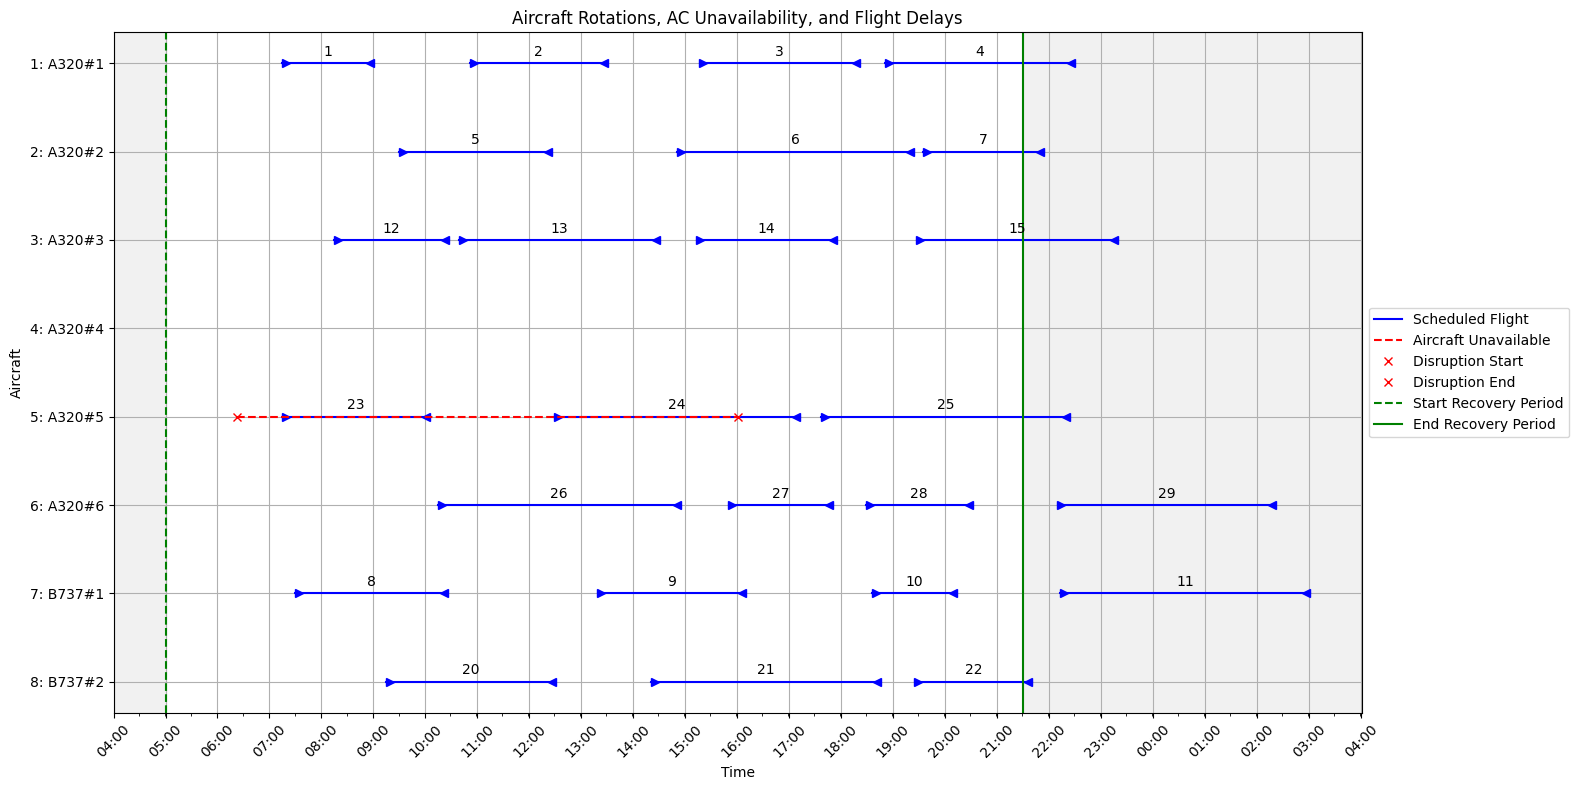

--------------------------------------------------
Step 2, Action: [4]
Aircraft Rotations for ../data/Training-new-2/Scenario_01


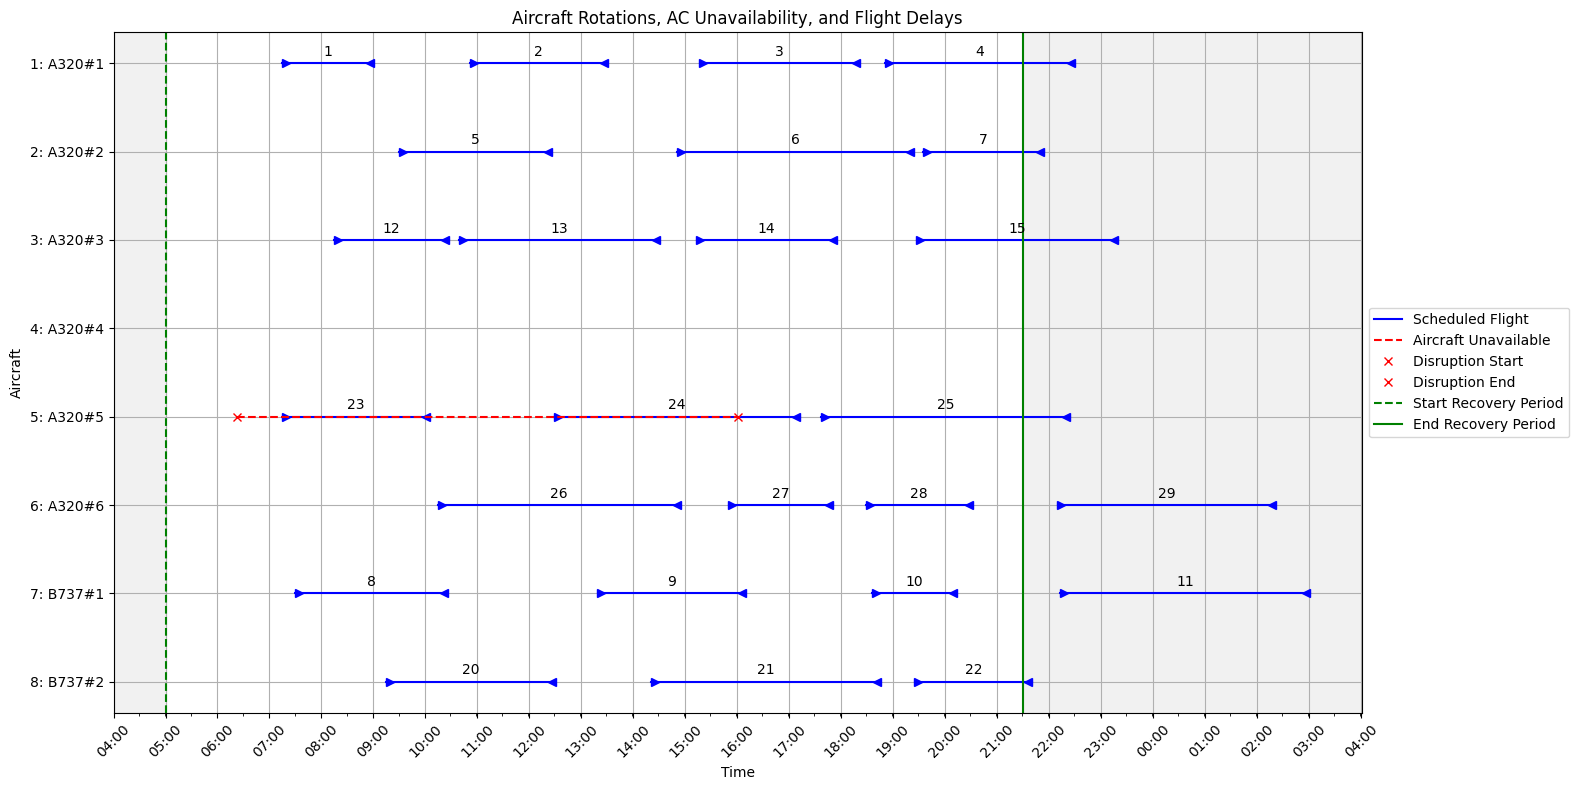

--------------------------------------------------
Step 3, Action: [4]
Aircraft Rotations for ../data/Training-new-2/Scenario_01


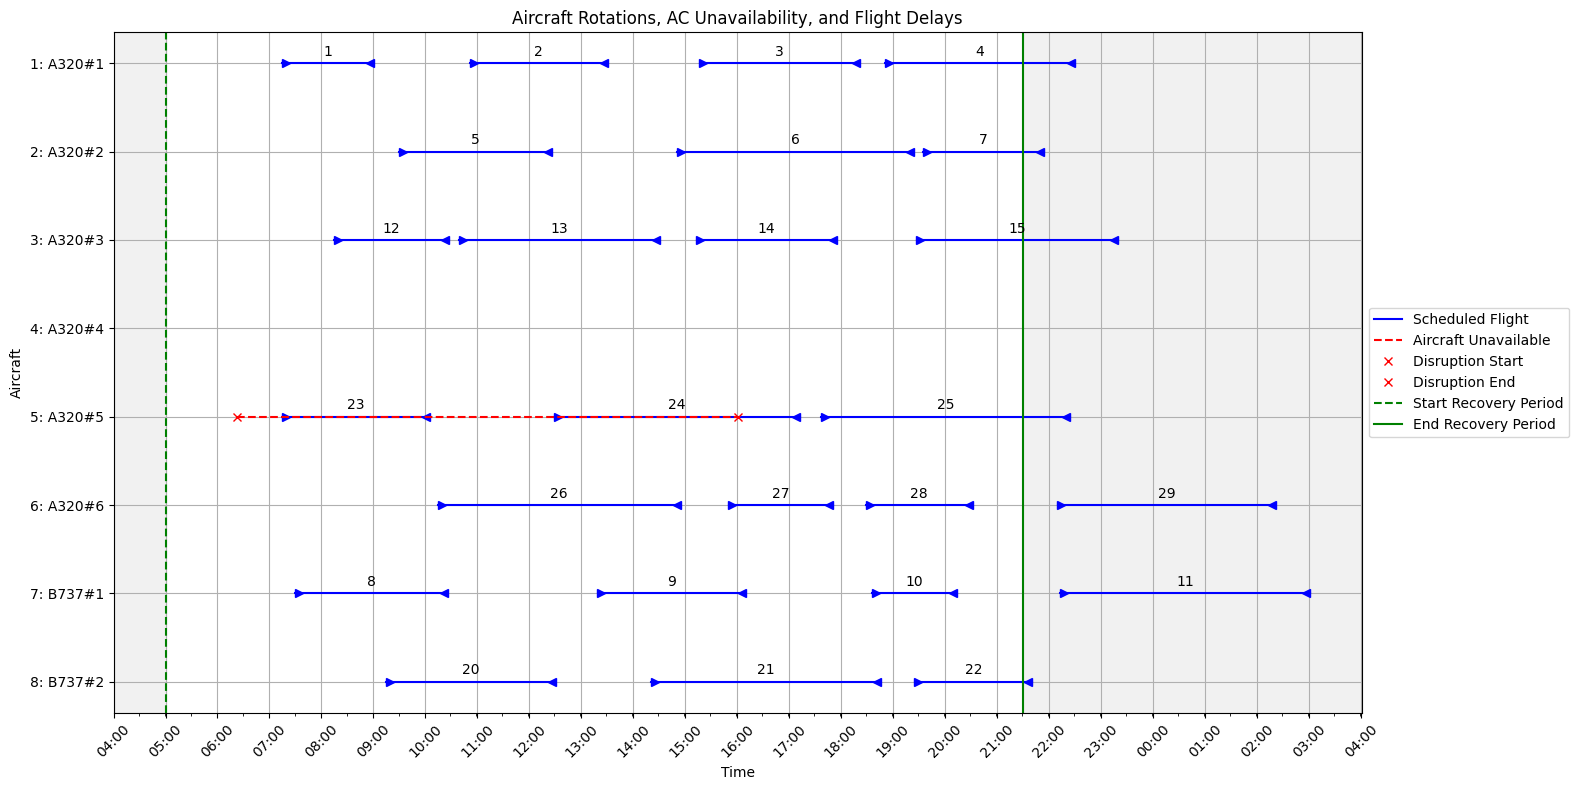

--------------------------------------------------
Total Reward for Best Action Sequence: 1965.0


In [7]:
import os
import ast
from scripts.visualizations import run_visualization
import pandas as pd

# Define the scenario and root folder for data
data_root_folder = '../data/Training-10-days/'
scenario_name = 'Scenario_01'
MODEL_SAVE_PATH = '../trained_models/dqn_25000d_10u-1.zip'

# Define the file path where action sequences are saved (adjust if necessary)
csv_file = os.path.join(data_root_folder, scenario_name, 'action_sequences.csv')

# Verify that the scenario exists
if not os.path.exists(data_root_folder + scenario_name):
    raise FileNotFoundError('The scenario does not exist at ' + data_root_folder + scenario_name)

# Load action sequences from the CSV
try:
    action_sequences_df = pd.read_csv(csv_file)
except FileNotFoundError:
    raise FileNotFoundError(f"This scenario has not been trained yet. ({csv_file} file not found)")

# Helper function to parse the action sequence string into a Python list
def parse_action_sequence(action_str):
    # Convert the string representation into a Python list
    action_str = action_str.replace("array(", "").replace(")", "")  # Remove 'array()' wrapping
    return ast.literal_eval(action_str)

# Retrieve the worst and best sequences for the model
worst_sequence = None
best_sequence = None
worst_reward = None
best_reward = None

for index, row in action_sequences_df.iterrows():
    if row['model_name'] == MODEL_SAVE_PATH and row['sequence_type'] == "worst action sequence":
        worst_sequence = parse_action_sequence(row['actions'])
        worst_reward = row['reward']
    if row['model_name'] == MODEL_SAVE_PATH and row['sequence_type'] == "best action sequence":
        best_sequence = parse_action_sequence(row['actions'])
        best_reward = row['reward']

if worst_sequence is None or best_sequence is None:
    raise ValueError(f"No model found for this scenario with name {MODEL_SAVE_PATH}.")

# Define function to visualize action sequences
def visualize_action_sequence(action_sequence, scenario_name, data_root_folder, title, total_reward):
    """
    Visualizes a given action sequence step by step.
    """
    print(f"Visualizing {title}")
    
    # Loop through each action in the sequence
    for step, action in enumerate(action_sequence):
        # Print the current action and step
        print(f"Step {step + 1}, Action: {action}")
        
        # Optionally: Run the visualization for this action
        run_visualization(scenario_name, data_root_folder, aircraft_rotations=True, airport_rotations=False)
        
        print("-" * 50)
    
    # After the complete sequence, print the total reward
    print(f"Total Reward for {title}: {total_reward}")
    print("=" * 50)

# Visualize the worst and best action sequences
visualize_action_sequence(worst_sequence, scenario_name, data_root_folder, "Worst Action Sequence", worst_reward)
visualize_action_sequence(best_sequence, scenario_name, data_root_folder, "Best Action Sequence", best_reward)
